In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def show_img(img,cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

In [4]:
def show_img_plt(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [5]:
def load_img(path):
    img = cv2.imread(path).astype(np.float32) / 255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

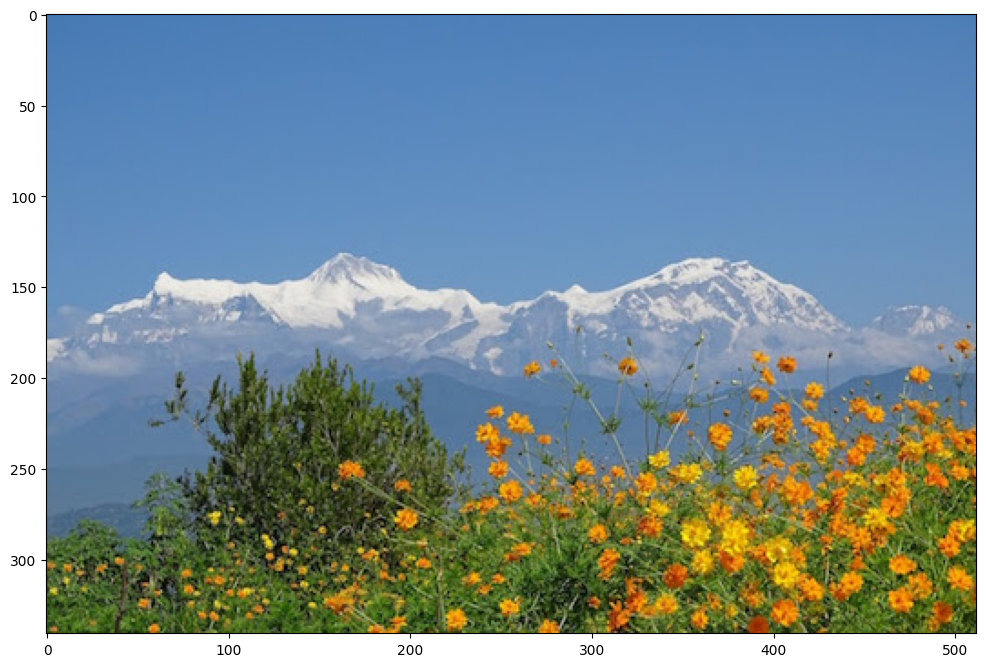

In [6]:
img = load_img('images/himalayas.jpg')
show_img(img)

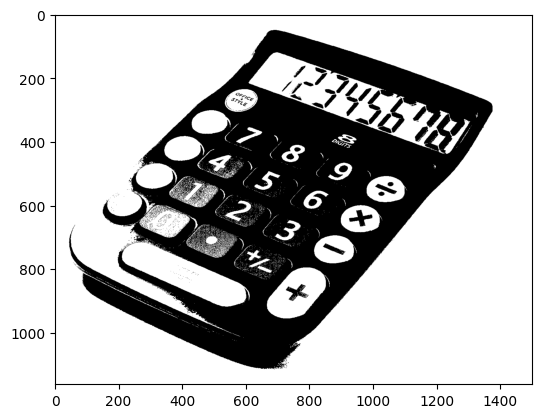

In [7]:
# imread(_,0) ni grayscale eer zurgiig avna gej bgaa
img = cv2.imread("images/lcd_calc.jpg", 0)
ret, th1 = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
plt.imshow(th1, cmap='gray')

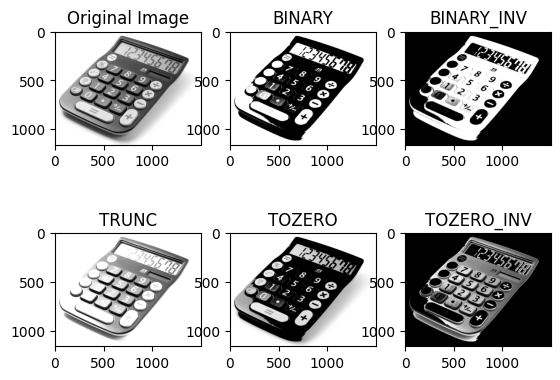

In [8]:
img = cv2.imread("images/lcd_calc.jpg", 0)

threshold_types = [
    (cv2.THRESH_BINARY, 'BINARY'),
    (cv2.THRESH_BINARY_INV, 'BINARY_INV'),
    (cv2.THRESH_TRUNC, 'TRUNC'),
    (cv2.THRESH_TOZERO, 'TOZERO'),
    (cv2.THRESH_TOZERO_INV, 'TOZERO_INV')
]

threshold_names = ["Original Image"] + [name for _, name in threshold_types]
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title(threshold_names[0])

for i in range(5):
    ret, returnImage = cv2.threshold(img, 155, 255, threshold_types[i][0])
    plt.subplot(2, 3, i + 2)
    plt.imshow(returnImage, cmap='gray')
    plt.title(threshold_names[i + 1])
plt.show()

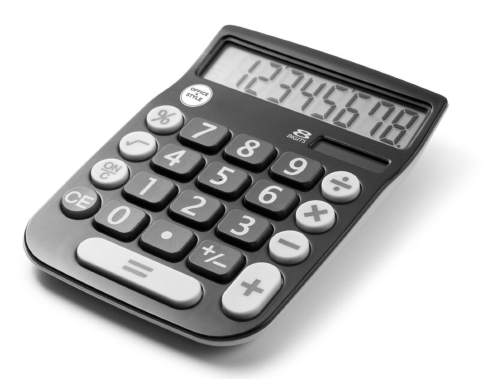

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('images/lcd_calc.jpg', 0)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

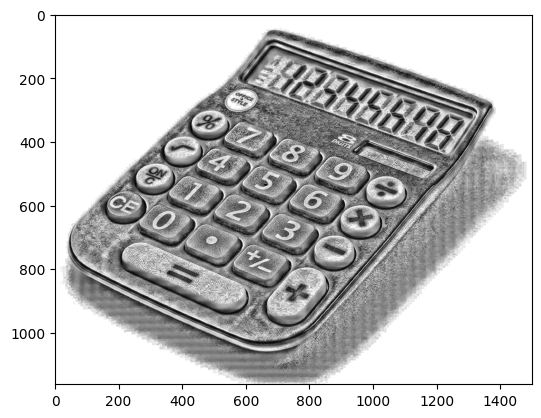

In [10]:
image = cv2.imread('images/lcd_calc.jpg', 0)
# gereliig effectiig bagasgasan
clahe = cv2.createCLAHE(clipLimit=25.0, tileGridSize=(50, 50))
equalized_image = clahe.apply(image)
plt.imshow(equalized_image, cmap='gray')

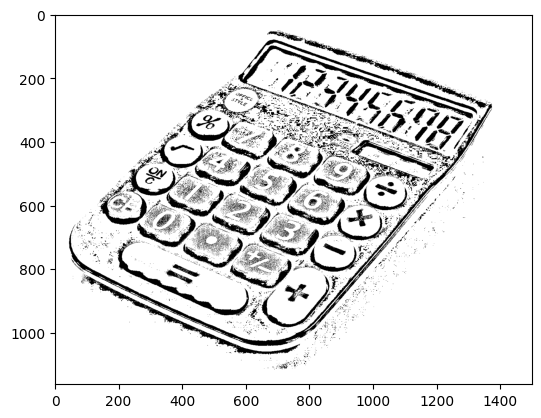

In [11]:
ret, img = cv2.threshold(equalized_image, 90, 255, cv2.THRESH_BINARY)
plt.imshow(img, cmap='gray')

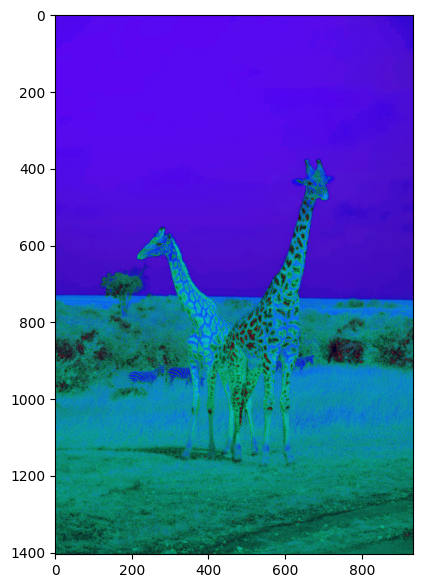

In [12]:
def display_img(img):
    plt.figure(figsize=(7, 7))
    plt.imshow(img)
    plt.axis('on')
    plt.show()

img = cv2.imread('images/giraffes.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
display_img(img_hsv)

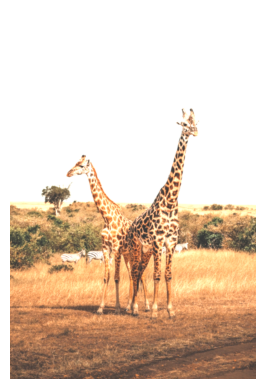

In [13]:
kernel = np.full((4, 4), 0.1, dtype=np.float32)
img = cv2.imread("images/giraffes.jpg")
dst = cv2.filter2D(img, -1, kernel)
show_img_plt(dst)

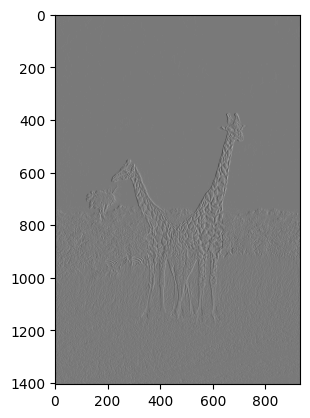

In [14]:
img = cv2.imread('images/giraffes.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img1 = cv2.Sobel(gray, cv2.CV_16S, 1, 0, 5,)
plt.imshow(img1, cmap='gray')

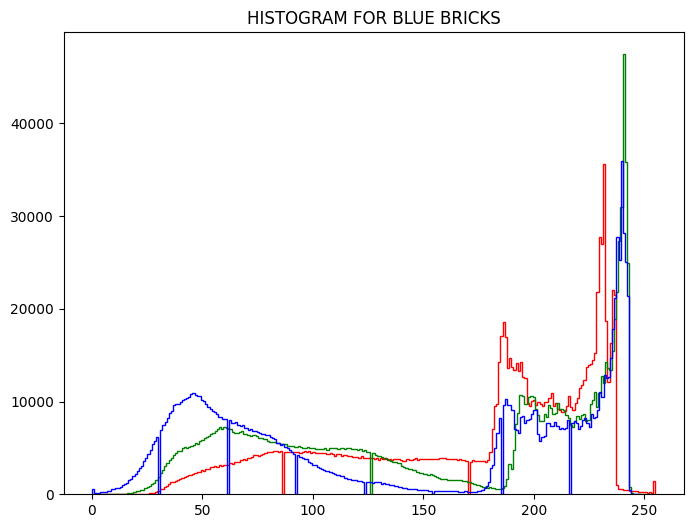

In [15]:
image = cv2.imread('images/giraffes.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

red_channel = image_rgb[:, :, 0]
green_channel = image_rgb[:, :, 1]
blue_channel = image_rgb[:, :, 2]

plt.figure(figsize=(8, 6))

plt.hist(red_channel.flatten(), bins=256, color='red', histtype='step', label='Red')
plt.hist(green_channel.flatten(), bins=256, color='green', histtype='step', label='Green')
plt.hist(blue_channel.flatten(), bins=256, color='blue', histtype='step', label='Blue')

plt.title('HISTOGRAM FOR BLUE BRICKS')
plt.show()

In [18]:
import cv2

cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
writer = cv2.VideoWriter('videos/BINARY.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 30, (width, height))

while True:
    ret, frame = cap.read()
    grayVideo = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, thresholded_frame = cv2.threshold(grayVideo, 155, 255, cv2.THRESH_BINARY)
    # 5 n threshold deer uurchilj ene codiig ajilluulsan
    writer.write(cv2.cvtColor(thresholded_frame, cv2.COLOR_GRAY2BGR))
    cv2.imshow('frame', thresholded_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
writer.release()
cv2.destroyAllWindows()

In [12]:
cap = cv2.VideoCapture('videos/TOZERO_INV.mp4')
if cap.isOpened() == False:
    print('Error file not found or wrong codec used')
while cap.isOpened():
    ret, frame = cap.read()
    if ret == True:
        cv2.imshow('frame', frame)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()